# EDS 296 Homework 1

Author: Haylee Oyler

Locate monthly data for a historical simulation run with any two CMIP6 models of your
choice. 

You may choose any climate variable you like; however, note that three-dimensional data is
generally larger and can be slower to load, so I recommend either choosing a two-
dimensional data field or reading in only the surface level if you choose 3D information.
Some common choices of variables to analyze, and their CMIP names, include:

- Surface air temperature (tas)
- Precipitation (pr)
- Sea surface temperature (tos)

Download (or write Python code to access via the cloud) data from the historical simulation,
as well as corresponding future projection information for two different future emissions
scenarios, for each model. NOTE: particularly if you’re working with the ESGF, there are
many different scenarios listed - let’s stick to the main SSPs (they will be called ‘ssp126’,
‘ssp245’, ‘ssp370’, or ‘ssp585’

Choose a region that you’re interested in to analyze, anywhere in the world. The only
constraint is that your region needs to be large enough to include at least one model grid
point

a. Describe, in markdown text, the climate of that region in general terms. What is it like? Is
it a forest, a desert, polar, tropical, urban, etc? What types of climate change impacts might
you expect there?

b. Read in the surface air temperature datasets from 1 and 2, and create annually averaged,
area-weighted, regionally averaged time series for your region of interest. (Examples of how
to do this can be found in the various Time Series Plots tutorials we used in class.)

Since you’re working with two models and two scenarios, this should result in four time
series — however, if you used the same historical ensemble member for multiple scenarios,
they will end up lying on top of each other and that’s ok

Plot your regional time series, and fit a trend line for two different time periods:
- historical (1850-2015)
- historical plus future (1850-2100)
Over both of those time periods, is the temperature of your region changing, and is that
change statistically significant

Write 1-2 paragraphs in markdown text describing the results of your plot, and what you
think they might mean for humans or ecosystems located in your study region

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [ ]:
# Specify search terms to query catalog for CanESM5 data
# activity_id: Selecting CMIP for historical and ScenarioMIP for future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: Keeping the same source model as other examples
source_id = ['CanESM5']

# experiment_id: I chose the historical data and the ssp370 projection as my two time experimental configurations
experiment_ids = ['historical', 'ssp370']

# member_id: Keeping the same ensemble method as in other examples
member_id = 'r10i1p1f1'

# table_id: Selecting monthly atmospheric data, which is the table that precipitation is stored in. 
table_id = 'Amon' 

# variable_id: I chose precipitation flux in kg m-2 s-1, it includes both liquid and solid phases.
variable_id = 'pr' 

In [22]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [23]:
# Read in the historical data file
hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP370 data file
ssp370_data = xr.open_zarr(res.df['zstore'][1], storage_options={'anon': True})

In [24]:
# Concatenate historical and future projection data
canesm5_data = xr.concat([hist_data, ssp370_data], dim="time")

In [25]:
canesm5_data

<xarray.Dataset>
Dimensions:    (lat: 64, bnds: 2, lon: 128, time: 3012)
Coordinates:
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 -90.0 -86.58 -86.58 ... 86.58 86.58 90.0
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 -1.406 1.406 1.406 ... 355.8 355.8 358.6
  * time       (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 dask.array<chunksize=(600, 64, 128), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his10
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variable_id:                 pr
    variant_label:               r10i1p1f1
    version:                     v20190429
    status:                      2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:         hdl:21.14100/e4e02024-0d74-4adb-8498-5159148...
    version_id:                  v20190429

In [26]:
# Convert time to datetime64 format
time = canesm5_data.time.astype('datetime64[ns]')

My area of interest is going to be the Congo Basin in West Africa. The Congo Basin is home to one of the largest rainforests in the world and understanding how carbon storage and other biogeochemical fluxes will change under the influence of climate change is crucial. 

12°E - 34°E and 9.3°N - 13.4°S

In [31]:
# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 9.3, 13.4
lon_min, lon_max = 12, 34

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
pr_congo_lat = (canesm5_data.lat >= lat_min) & (canesm5_data.lat <= lat_max)
pr_congo_lon = (canesm5_data.lon >= lon_min) & (canesm5_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
pr_congo = canesm5_data.where(pr_congo_lat & pr_congo_lon, drop=True)

# Average over lat, lon dimensions to get a time series
pr_congo = pr_congo.mean(dim=["lat", "lon"])

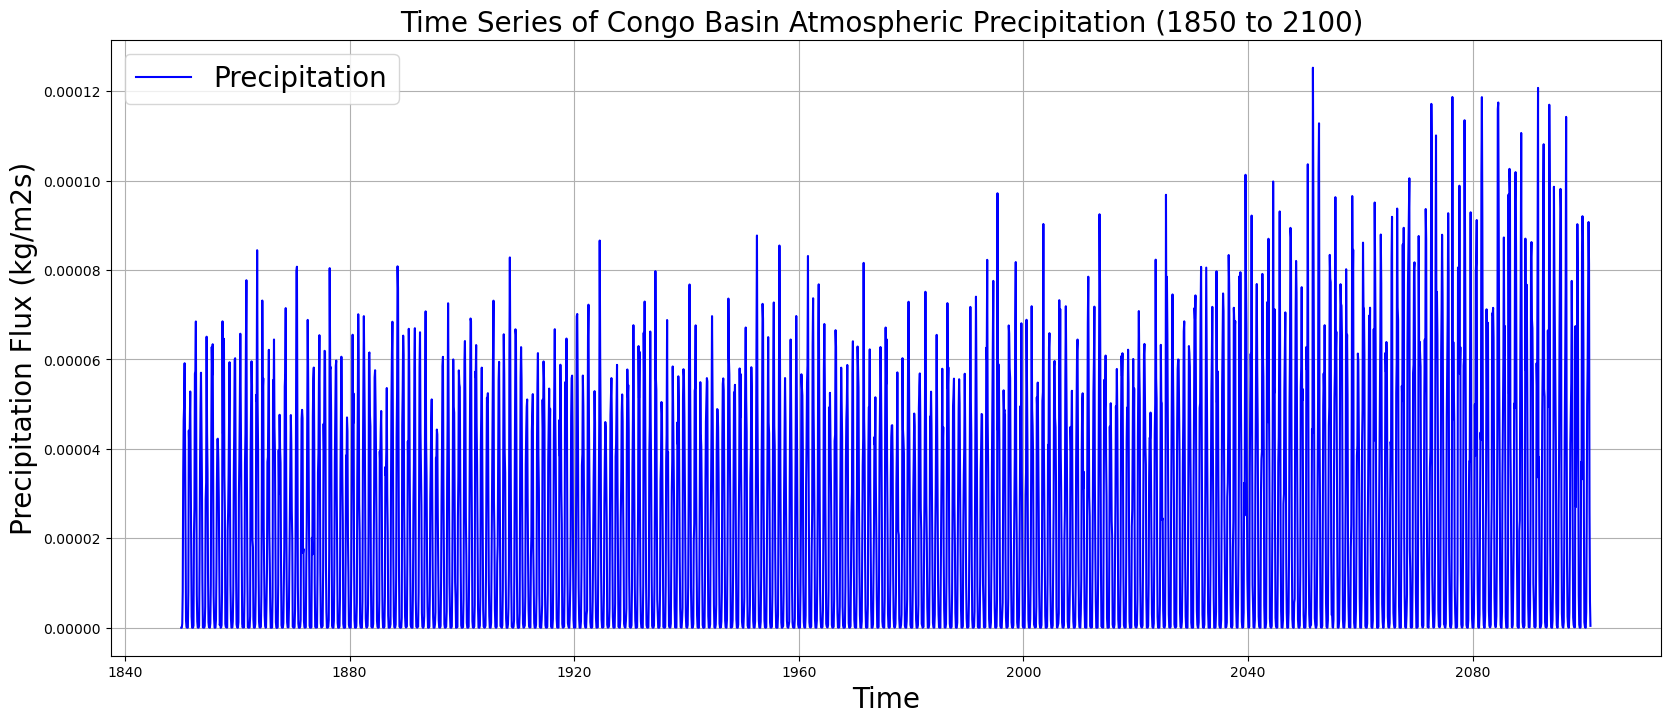

In [32]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, pr_congo.pr, label='Precipitation', color='b')
ax.set_title("Time Series of Congo Basin Atmospheric Precipitation (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Precipitation Flux (kg/m2s)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()